# Biomedical - Midterm project


## Introduction

What is ECG and ECG Signal?

## ECG:
The ECG is nothing but the recording of the hearts electrical activity.The deviations in the normal electrical patterns indicate various cardiac disorders.Probes are attached in various positions of the heart to extract the obersvations of heart. normally the disorders of the the heart are observed during this process.[1]

## ECG signal:

An ECG gives 2 types of information: whether the electrical activity is slow or fast. 2. whether the parts of the heart are too large or overworked .ECG signal is charecerized by 5 peaks and valleys labelled by letters P, Q, R, S, T. Accurate detection of the R wave peak, is essential in computer-based ECG analysis. Depending on the signal we can say the performance of the heart beat. QRS Detection will be done.[2]


Q2 Bibliography

References:
    1. ManuelBlanco-VelascoaBinweiWengbKenneth E.Barnerc "ECG signal denoising and baseline wander correction based on the empirical mode decomposition"    Received 18 July 2006, Revised 10 May 2007, Accepted 18 June 2007, Available online 31 July 2007.
    2. Using Wavelet Transforms for ECG Characterization .S.Sahambi’, S.N. Tandonz5  R.K.P. Bhatt’ 
    3. D.BenitezaP.A.GaydeckiaA.ZaidibA.P.Fitzpatrickb "The use of the Hilbert transform in ECG signal analysis" Received 16 June 2000, Accepted 16 January 2001, Available online 29 August 2001.
    4. LG Herrera-Bendezd, J Garcia, BG Deny " Real-Time Digital filters foe ECG signals: Evaluation and new designs"

In [ ]:
Q. 4

In [210]:
%matplotlib inline

import scipy.linalg
import scipy as Sci
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
#we use a simple open command for the file
Wave = open('aami3a(2).dat','rb')
#we read it using an numpy command that allows direct reading from file into an array
ecg = np.fromfile(Wave,count=-1,dtype=np.uint16)
# to verify the size of the file
print('\n The length of the file is: ' + str(len(ecg)) )



 The length of the file is: 43081


In [ ]:
Q.4

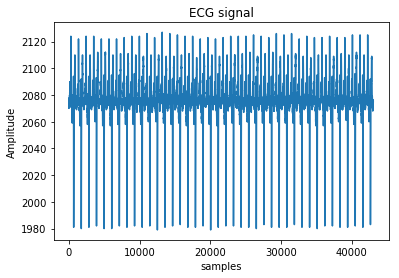

In [211]:
plt.plot(ecg[:43081])
plt.title('ECG signal')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
Wave.close() 

If a person average is between 60 - 100.

Then if take it as 85,
85/60 = 1.41666 (num of beats/second)
We need 5 beats,
1.4166*5 = 7.083333(multiply the Ans with 5 beats)
number of signals = 7.083333/(1.41666*10e-3)
                        = 5000.21177 which is approximately 5000.
75/85 = 0.88235294
0.88235294*5 = 4.41176471
4.41176/0.88235294*10e-3 =4999.99 approximately 5000.



In [ ]:
Q.5


 The no of samples for 5 beats: 5000


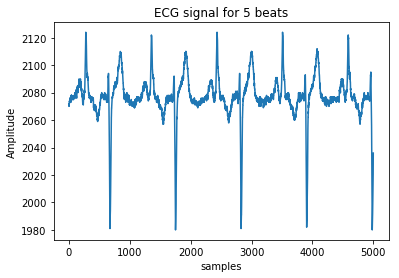

In [151]:
x=np.arange(0,5000/75e1,1/75e1) # starting from 0 to 5000 samples dividing with frequency
print('\n The no of samples for 5 beats: ' + str(len(x)) )
plt.plot(ecg[:5000]) # plotting the graph
plt.title('ECG signal for 5 beats')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
Wave.close() 

Q 6


 The no of samples for 5 beats: 750


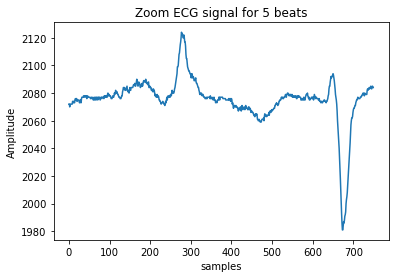

In [212]:
x=np.arange(0,750/75e1,1/75e1) # starting from 0 and dividing with frequency
print('\n The no of samples for 5 beats: ' + str(len(x)) )
plt.plot(ecg[:750]) # plotting the graph
plt.title('Zoom ECG signal for 5 beats')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
Wave.close()  

Q7 by observing the code we observe that the person is having lower heart beat

Q8 

In [213]:
y=np.amax(ecg[:5000])
print 'max = '   +str(y)

max = 2124


In [214]:
t=np.arange(21541)
P=0
for index in t:
    if ecg[index]>=2124:
        P=P+1
print 'heart beat per minute= ' +str(P*2)

heart beat per minute= 44


Q9

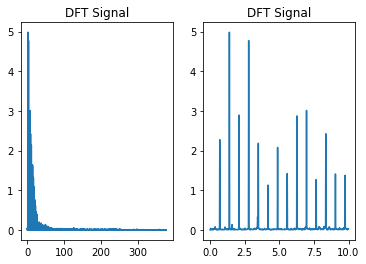

In [156]:
#we first eliminate dc
FirstLine=ecg[:43081]
data=FirstLine-np.mean(FirstLine)
L=len(data)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT Signal')
#Zooming into just less than 1MHz
inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT Signal')


Q10

In [215]:
S=np.amax(Pyy[:21481])
print 'max = '   +str(S)

max = 4.98176674504


In [216]:
Q=np.arange(21541)
q=max(Pyy)
for index in Q:
    if Pyy[index]>=4.981766:
        print 'heart beat per minute= ' +str(index/57.44)
        break

heart beat per minute= 1.39275766017


Q11 & 12

 Heart rate =60/f
    60/1.3927
    Heart rate=43

Q13

There is no effect on the amplitude.[4]

Q14

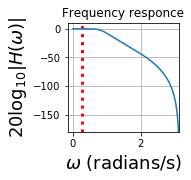

In [219]:
%matplotlib inline
from __future__ import division
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib import gridspec

#this here only adjust the aspect of the plots
fig=plt.figure()
fig.set_size_inches((5,5))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
fs=750
NQ=fs/2
cutoff=100
wn=100/NQ
b,a=signal.butter(4,wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43081/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()


Q15

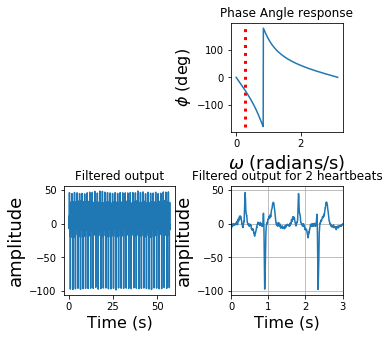

In [220]:

%matplotlib inline
from __future__ import division
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib import gridspec

#this here only adjust the aspect of the plots
fig=plt.figure()
fig.set_size_inches((5,5))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
fs=750
NQ=fs/2
cutoff=100
wn=100/NQ

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(wn,-180,180,linestyles=':',color='r',lw=3.)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s)
ax.set_title('Filtered output')
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Time (s)',fontsize=16)

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s)
ax.set_xlim(xmax = 3, xmin =0)
ax.set_title('Filtered output for 2 heartbeats')
ax.set_ylabel("amplitude",fontsize=18)
ax.set_xlabel('Time (s)',fontsize=16)

ax.grid()


Q16

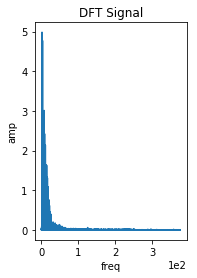

In [221]:

L=len(data)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT Signal')
plt.xlabel('freq')
plt.ylabel('amp')
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

Q17
Amplitude does not change on any change interuption.